In [4]:
import numpy as np

In [8]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [9]:
import json

In [10]:
from geopy.geocoders import Nominatim

In [11]:
import requests

In [13]:
from pandas.io.json import json_normalize

In [15]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [17]:
from sklearn.cluster import KMeans

In [18]:
import folium

In [20]:
import urllib

In [22]:
from bs4 import BeautifulSoup

In [23]:
import requests

In [28]:
from lxml import html

In [29]:
import os

In [58]:
import csv

In [59]:
print('libraries extracted')

libraries extracted


In [91]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) #display all rows & columns

#! pip install BeautifulSoup4
from bs4 import BeautifulSoup #library to parse HTML and XML documents
import requests  # library to handle requests

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [92]:
url="https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods"
source = requests.get(url).text

soup = BeautifulSoup(source, 'lxml')

In [93]:
table=soup.find('table', class_='wikitable sortable')

df_list = pd.read_html(str(table)) #list of dataframes
df=df_list[0] #Getting one & only dataframe from the list and assign into var df 
df.head(10)

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0378.08, 0378.14, 0378.23, 0378.24",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN
5,Amesbury,NY,"0280.00, 0281.01, 0281.02",17318,3.51,4934,1.1,27546,16.4,19.7,Spanish (6.1%),06.1% Spanish,NaN
6,Armour Heights,NY,0298.00,4384,2.29,1914,2.0,116651,10.8,16.1,Russian (9.4%),09.4% Russian,NaN
7,Banbury,NY,0267.00,6641,2.72,2442,5.0,92319,6.1,4.8,Unspecified Chinese (5.1%),05.1% Unspecified Chinese,NaN
8,Bathurst Manor,NY,"0297.01, 0310.01, 0310.02",14945,4.69,3187,12.3,34169,13.4,18.6,Russian (9.5%),09.5% Russian,NaN
9,Bay Street Corridor,OCoT,0062.01,4787,0.11,43518,3.0,40598,17.1,49.3,Mandarin (9.6%),09.6% Mandarin,NaN


In [94]:
df.shape

(175, 13)

In [119]:
#Rename column names 
df = df.rename(columns = {
    "Name":"Neighbourhood",
    "Land area (km2)":"Land Area",
    "Density (people/km2)":"Density",
    "Second most common language (after English) by name":"2nd Language"
})

In [120]:
print(df.shape)
df.head()

(174, 13)


,Neighbourhood,FM,Census Tracts,Population,Land Area,Density,% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,2nd Language,Second most common language (after English) by percentage,Map
0,Old East York,EY,"0180.00, 0181.01, 0181.02, 0182.00, 0183.00, 0184.01, 0184.02, 0185.01, 0185.02, 0187.00, 0188.00",52220,7.94,6577,-4.6,33172,22.0,19.1,Greek (4.3%),04.3% Greek,NaN
1,Woburn,S,"0356.00, 0357.01, 0357.02, 0363.07, 0364.01, 0364.02, 0365.00, 0366.00, 0367.01",48507,13.34,3636,-1.5,26190,13.3,16.0,Gujarati (9.1%),09.1% Gujarati,NaN
2,Elia (Jane and Finch),NY,"0312.02, 0312.03, 0312.04, 0312.05, 0312.06, 0312.07, 0316.01, 0316.03, 0316.04, 0316.05, 316.06",48003,7.66,6267,-10.0,22691,13.0,18.8,Vietnamese (6.9%),06.9% Vietnamese,NaN
3,L'Amoreaux,S,"0375.01, 0375.04, 0375.05, 0376.01, 0376.02, 0376.08, 0376.11,0376.12",45862,7.15,6414,0.9,26375,13.4,11.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,NaN
4,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0378.08, 0378.14, 0378.23, 0378.24",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN


In [98]:
df.dtypes

Neighbourhood                                                 object
FM                                                            object
Census Tracts                                                 object
Population                                                     int64
Land Area                                                    float64
Density                                                        int64
% Change in Population since 2001                            float64
Average Income                                                 int64
Transit Commuting %                                          float64
% Renters                                                    float64
2nd Language                                                  object
Second most common language (after English) by percentage     object
Map                                                          float64
dtype: object

In [99]:
df.sort_values(by=['Population'], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

In [100]:
df_top15=df[df.index<15]

In [101]:
df_top15

,Neighbourhood,FM,Census Tracts,Population,Land Area,Density,% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,2nd Language,Second most common language (after English) by percentage,Map
0,Old East York,EY,"0180.00, 0181.01, 0181.02, 0182.00, 0183.00, 0184.01, 0184.02, 0185.01, 0185.02, 0187.00, 0188.00",52220,7.94,6577,-4.6,33172,22.0,19.1,Greek (4.3%),04.3% Greek,NaN
1,Woburn,S,"0356.00, 0357.01, 0357.02, 0363.07, 0364.01, 0364.02, 0365.00, 0366.00, 0367.01",48507,13.34,3636,-1.5,26190,13.3,16.0,Gujarati (9.1%),09.1% Gujarati,NaN
2,Elia (Jane and Finch),NY,"0312.02, 0312.03, 0312.04, 0312.05, 0312.06, 0312.07, 0316.01, 0316.03, 0316.04, 0316.05, 316.06",48003,7.66,6267,-10.0,22691,13.0,18.8,Vietnamese (6.9%),06.9% Vietnamese,NaN
3,L'Amoreaux,S,"0375.01, 0375.04, 0375.05, 0376.01, 0376.02, 0376.08, 0376.11,0376.12",45862,7.15,6414,0.9,26375,13.4,11.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,NaN
4,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0378.08, 0378.14, 0378.23, 0378.24",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
5,Malvern,S,"0378.03, 0378.04, 0378.05, 0378.06, 0378.11, 0378.12, 0378.16, 0378.17",44324,8.86,5003,1.5,25677,13.6,8.2,Tamil (12.2%),12.2% Tamil,NaN
6,Willowdale,NY,"0300.00, 0306.01, 0306.02, 0307.02, 0308.01, 0308.02",43144,7.68,5618,62.3,39895,15.6,12.9,Cantonese (7.9%),07.9% Cantonese,NaN
7,Downsview,NY,"0289.00, 0290.00, 0291.01, 0291.02, 0292.00, 0294.01, 0294.02, 0295.00, 0296.00",36613,16.13,2270,-5.0,26751,14.4,18.3,Italian (11.7%),11.7% Italian,NaN
8,Newtonbrook,NY,"0318.00, 0319.00, 0320.01, 0320.02, 0321.01, 0321.02, 0322.00",36046,8.77,4110,0.3,33428,16.6,14.3,Russian (8.8%),08.8% Russian,NaN
9,Smithfield,E,"0248.02, 0248.04, 0248.05, 0249.01, 0249.04, 0249.05, 0250.04",34996,6.45,5426,-7.2,24387,12.8,12.7,Punjabi (11.8%),11.8% Punjabi,NaN


In [102]:
# define the dataframe columns
column_names = ['Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
coordinates = pd.DataFrame(columns=column_names)

In [103]:
for neighbourhood in df_top15['Neighbourhood']:
    geolocator = Nominatim(user_agent="tor_explorer")
    location = geolocator.geocode('{}, Toronto, Ontario'.format(neighbourhood))
    latitude = location.latitude
    longitude = location.longitude

    
    coordinates = coordinates.append({'Neighbourhood': neighbourhood,
                                      'Latitude': latitude,
                                      'Longitude': longitude}, ignore_index=True)

In [104]:
coordinates

,Neighbourhood,Latitude,Longitude
0,Old East York,43.699971,-79.332520
1,Woburn,43.759824,-79.225291
2,Elia (Jane and Finch),43.757253,-79.517697
3,L'Amoreaux,43.799003,-79.305967
4,Agincourt,43.785353,-79.278549
5,Malvern,43.809196,-79.221701
6,Willowdale,43.761510,-79.410923
7,Downsview,43.749299,-79.462248
8,Newtonbrook,43.793886,-79.425679
9,Smithfield,43.631184,-79.485667


In [105]:
#Merge two datasets using Neighbourhood
df_cord = pd.merge(df_top15, coordinates, on='Neighbourhood')

In [106]:
df_cord

,Neighbourhood,FM,Census Tracts,Population,Land Area,Density,% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,2nd Language,Second most common language (after English) by percentage,Map,Latitude,Longitude
0,Old East York,EY,"0180.00, 0181.01, 0181.02, 0182.00, 0183.00, 0184.01, 0184.02, 0185.01, 0185.02, 0187.00, 0188.00",52220,7.94,6577,-4.6,33172,22.0,19.1,Greek (4.3%),04.3% Greek,NaN,43.699971,-79.332520
1,Woburn,S,"0356.00, 0357.01, 0357.02, 0363.07, 0364.01, 0364.02, 0365.00, 0366.00, 0367.01",48507,13.34,3636,-1.5,26190,13.3,16.0,Gujarati (9.1%),09.1% Gujarati,NaN,43.759824,-79.225291
2,Elia (Jane and Finch),NY,"0312.02, 0312.03, 0312.04, 0312.05, 0312.06, 0312.07, 0316.01, 0316.03, 0316.04, 0316.05, 316.06",48003,7.66,6267,-10.0,22691,13.0,18.8,Vietnamese (6.9%),06.9% Vietnamese,NaN,43.757253,-79.517697
3,L'Amoreaux,S,"0375.01, 0375.04, 0375.05, 0376.01, 0376.02, 0376.08, 0376.11,0376.12",45862,7.15,6414,0.9,26375,13.4,11.4,Unspecified Chinese (13.9%),13.9% Unspecified Chinese,NaN,43.799003,-79.305967
4,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0378.08, 0378.14, 0378.23, 0378.24",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN,43.785353,-79.278549
5,Malvern,S,"0378.03, 0378.04, 0378.05, 0378.06, 0378.11, 0378.12, 0378.16, 0378.17",44324,8.86,5003,1.5,25677,13.6,8.2,Tamil (12.2%),12.2% Tamil,NaN,43.809196,-79.221701
6,Willowdale,NY,"0300.00, 0306.01, 0306.02, 0307.02, 0308.01, 0308.02",43144,7.68,5618,62.3,39895,15.6,12.9,Cantonese (7.9%),07.9% Cantonese,NaN,43.761510,-79.410923
7,Downsview,NY,"0289.00, 0290.00, 0291.01, 0291.02, 0292.00, 0294.01, 0294.02, 0295.00, 0296.00",36613,16.13,2270,-5.0,26751,14.4,18.3,Italian (11.7%),11.7% Italian,NaN,43.749299,-79.462248
8,Newtonbrook,NY,"0318.00, 0319.00, 0320.01, 0320.02, 0321.01, 0321.02, 0322.00",36046,8.77,4110,0.3,33428,16.6,14.3,Russian (8.8%),08.8% Russian,NaN,43.793886,-79.425679
9,Smithfield,E,"0248.02, 0248.04, 0248.05, 0249.01, 0249.04, 0249.05, 0250.04",34996,6.45,5426,-7.2,24387,12.8,12.7,Punjabi (11.8%),11.8% Punjabi,NaN,43.631184,-79.485667


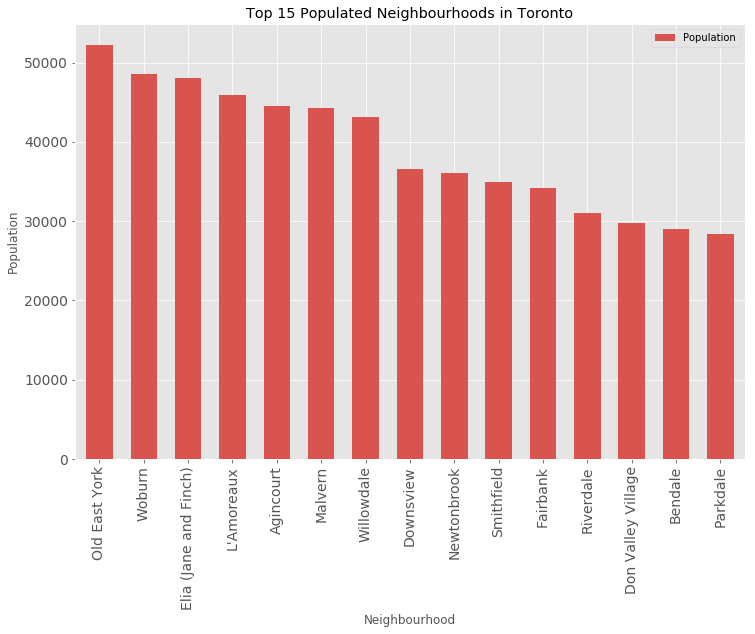

In [107]:
pop_chart = df_top15[['Neighbourhood', 'Population']].copy()
top_chart = pop_chart.head(15)
top_chart.set_index('Neighbourhood', inplace=True)

# plot data
colors = '#d9534f'
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title('Top 15 Populated Neighbourhoods in Toronto') # add title to the plot

plt.show()

In [108]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [109]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(df_cord['Latitude'], df_cord['Longitude'], df_cord['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [110]:
df_cord.loc[0, 'Neighbourhood']

'Old East York'

In [111]:
neighbourhood_latitude = df_cord.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = df_cord.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = df_cord.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Old East York are 43.699971000000005, -79.33251996261595.


In [154]:
CLIENT_ID = 'HEVQFTG4SBI3HS32EVO0O4SCROYPAR1EHJ1KGFNIK2S2NBWX'
CLIENT_SECRET = 'Z4DYZT52EHY0PYJDBBV1C1DNYIXWDIKXG2IK41MLQEGJBZLI'
VERSION = '20200222'
    
print('Your credentials:')
print('Client_ID = ' + CLIENT_ID)
print('Client_Secret = ' + CLIENT_SECRET)


Your credentials:
Client_ID = HEVQFTG4SBI3HS32EVO0O4SCROYPAR1EHJ1KGFNIK2S2NBWX
Client_Secret = Z4DYZT52EHY0PYJDBBV1C1DNYIXWDIKXG2IK41MLQEGJBZLI


In [155]:
df_cord.loc[0, 'Neighbourhood']

'Old East York'

In [156]:
neighbourhood_latitude = df_cord.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = df_cord.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = df_cord.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Old East York are 43.699971000000005, -79.33251996261595.


In [157]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
#url # display URL

In [158]:
results = requests.get(url).json()
#results

In [159]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [160]:
# clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Taylor Creek Park - West,Park,43.701260,-79.331726
1,Mon K Patisserie,Pastry Shop,43.696922,-79.329520
2,LCBO,Liquor Store,43.696728,-79.328875
3,Remarks Bar & Grill,Pub,43.696726,-79.329219
4,Pizza Hut,Pizza Place,43.696383,-79.328778


In [161]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


In [162]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [163]:
toronto_venues = getNearbyVenues(names=df_cord['Neighbourhood'],
                                   latitudes=df_cord['Latitude'],
                                   longitudes=df_cord['Longitude']
                                  )

Old East York
Woburn
Elia (Jane and Finch)
L'Amoreaux
Agincourt
Malvern
Willowdale
Downsview
Newtonbrook
Smithfield
Fairbank
Riverdale
Don Valley Village
Bendale
Parkdale


In [164]:
print(toronto_venues.shape)
toronto_venues.head()

(311, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Old East York,43.699971,-79.33252,Taylor Creek Park - West,43.701260,-79.331726,Park
1,Old East York,43.699971,-79.33252,Mon K Patisserie,43.696922,-79.329520,Pastry Shop
2,Old East York,43.699971,-79.33252,LCBO,43.696728,-79.328875,Liquor Store
3,Old East York,43.699971,-79.33252,Remarks Bar & Grill,43.696726,-79.329219,Pub
4,Old East York,43.699971,-79.33252,Pizza Hut,43.696383,-79.328778,Pizza Place


In [165]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,14,14,14,14,14,14
Bendale,6,6,6,6,6,6
Don Valley Village,11,11,11,11,11,11
Downsview,10,10,10,10,10,10
Elia (Jane and Finch),21,21,21,21,21,21
Fairbank,10,10,10,10,10,10
L'Amoreaux,5,5,5,5,5,5
Malvern,14,14,14,14,14,14
Newtonbrook,38,38,38,38,38,38


In [166]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 104 uniques categories.


In [169]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood
0,Old East York
1,Old East York
2,Old East York
3,Old East York
4,Old East York
